In [100]:
# Regressing thermophysical data of saturated and superheated vapor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D


In [101]:
df=pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/superheated_vapor.csv")
print(df.columns)
print()
df.head(10)

Index(['Pressure', 'Property', 'Liq_Sat', 'Vap_Sat', '75', '100', '125', '150',
       '175', '200', '220', '225', '240', '250', '260', '275', '280', '290',
       '300', '320', '325', '340', '350', '360', '375', '380', '400', '425',
       '450', '475', '500', '525', '550', '575', '600', '625', '650'],
      dtype='object')



,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.0000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.0000,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.3340,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.9000,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.1060,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.8200,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.0100,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.0000,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000
5,10.0,U,191.8220,2438.0000,2479.7000,2515.6000,2551.6000,2588.0000,2624.5000,2661.4000,...,NaN,3049.8000,NaN,3132.3000,NaN,3216.6000,NaN,3302.6000,NaN,3390.3000
6,10.0,H,191.8320,2584.8000,2640.0000,2687.5000,2735.2000,2783.1000,2831.2000,2879.6000,...,NaN,3383.5000,NaN,3489.1000,NaN,3596.5000,NaN,3705.5000,NaN,3816.3000
7,10.0,S,0.6493,8.1511,8.3168,8.4486,8.5722,8.6888,8.7994,8.9045,...,NaN,9.7572,NaN,9.8984,NaN,10.0329,NaN,10.1616,NaN,10.2849
8,20.0,V,1.0170,7649.8000,8000.0000,8584.7000,9167.1000,9748.0000,10320.0000,10900.0000,...,NaN,16680.0000,NaN,17830.0000,NaN,18990.0000,NaN,20140.0000,NaN,21300.0000
9,20.0,U,251.4320,2456.9000,2478.4000,2514.6000,2550.9000,2587.4000,2624.1000,2661.0000,...,NaN,3049.7000,NaN,3132.3000,NaN,3216.5000,NaN,3302.5000,NaN,3390.2000


In [102]:
np.max(df['Pressure'])

11400.0

In [103]:
# V = df.iloc[np.where(df['Property'] == 'V')]
V=df.loc[df['Property']=='V']
H=df.loc[df['Property']=='H']
U=df.loc[df['Property']=='U']
S=df.loc[df['Property']=='S']


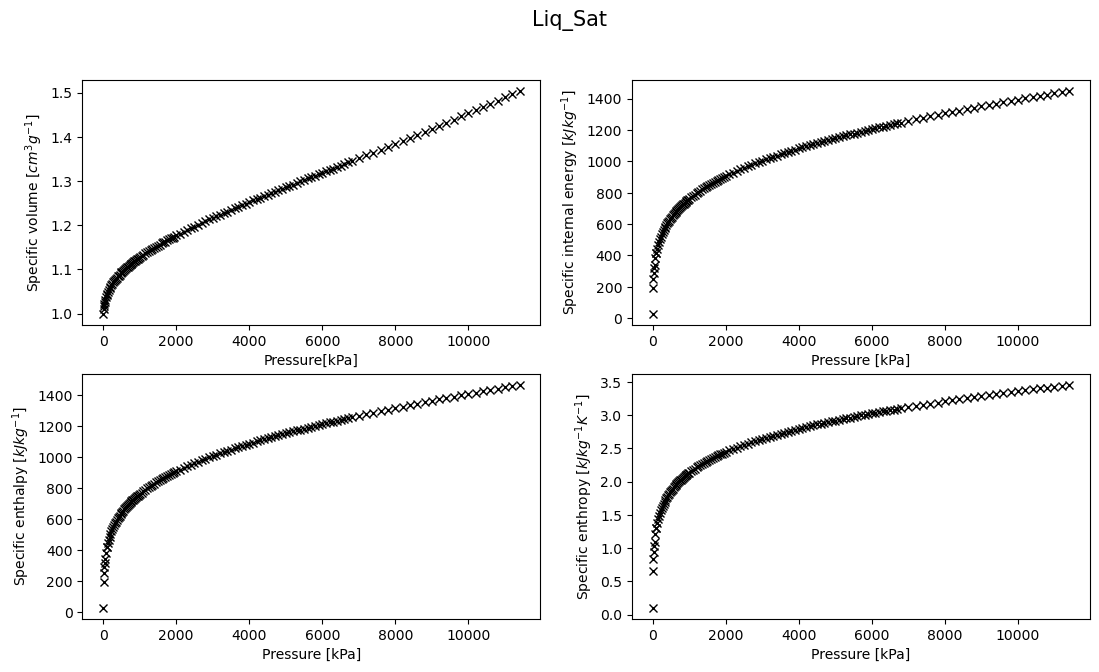

In [104]:
plt.figure(figsize=(13,7))

plt.subplot(221) # plt.subplot(rows, cols, index)
plt.plot(V["Pressure"],V["Liq_Sat"], "kx")
plt.xlabel("Pressure[kPa]")
plt.ylabel("Specific volume [$cm^{3} g^{-1}$]")

plt.subplot(222)
plt.plot(U['Pressure'], U["Liq_Sat"], 'kx')
plt.xlabel('Pressure [kPa]')
plt.ylabel('Specific internal energy [$kJ kg^{-1}$]')

plt.subplot(223)
plt.plot(H['Pressure'], H["Liq_Sat"], 'kx')
plt.xlabel('Pressure [kPa]')
plt.ylabel('Specific enthalpy [$kJ kg^{-1}$]')

plt.subplot(224)
plt.plot(S['Pressure'], S["Liq_Sat"], 'kx')
plt.xlabel('Pressure [kPa]')
plt.ylabel('Specific enthropy [$kJ kg^{-1} K^{-1}$]')

plt.suptitle("Liq_Sat", size=15)
plt.show()


In [105]:
V["Liq_Sat"].describe()

count    136.000000
mean       1.215382
std        0.128941
min        1.000000
25%        1.111500
50%        1.191000
75%        1.309750
max        1.504000
Name: Liq_Sat, dtype: float64

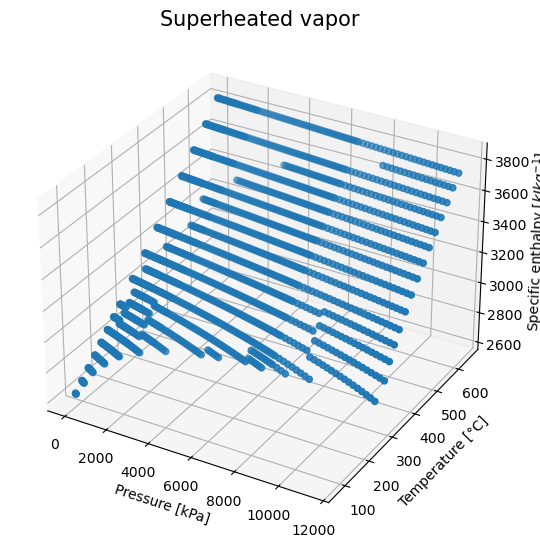

In [106]:
#3d

fig=plt.figure(figsize=(10,5))
ax=Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

#fig = plt.figure(figsize=(10,5))
#ax = fig.add_subplot(111, projection='3d')

x=H['Pressure']
y= H.columns[4:].astype(int) 
X,Y = np.meshgrid(x,y) # np.meshgrid(x, y) creates a 2D grid of coordinates from two 1D arrays x and y. 
Z= H.loc[:, "75":"650"]
ax.scatter(X, Y, Z.T)
ax.set_xlabel('Pressure [kPa]')
ax.set_ylabel('Temperature [°C]')
ax.set_zlabel('Specific enthalpy [$kJ kg^{-1}$]')
ax.set_title('Superheated vapor', size=15)
plt.show()

In [107]:
x=H["Pressure"]

y=H.columns[0]
print(y)

z=H.loc[:,"75"]
print(z)

Pressure
2      2641.5
6      2640.0
10     2638.4
14     2636.8
18        NaN
        ...  
526       NaN
530       NaN
534       NaN
538       NaN
542       NaN
Name: 75, Length: 136, dtype: float64


R² Score on Training Data: 0.9875
R² Score on Test Data: 0.9884


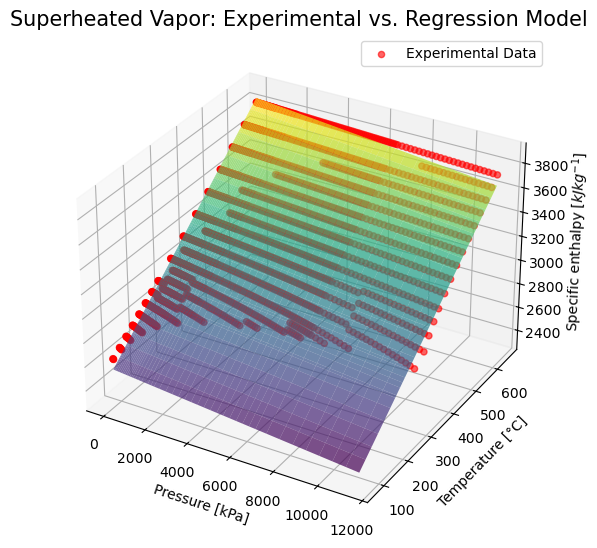

In [108]:
# --- FIX: Ensure proper data filtering before training ---
Ps = X.reshape(-1, 1)
Ts = Y.reshape(-1, 1)
Hs = np.array(Z.T).reshape(-1, 1)  # Transpose before reshaping

# Remove NaN values
mask = ~np.isnan(Hs)
P_clean = Ps[mask].reshape(-1, 1)
T_clean = Ts[mask].reshape(-1, 1)
H_clean = Hs[mask].reshape(-1, 1)

model = LinearRegression()

# Train Multi-Variate Linear Regression Model
X_train, X_test, Y_train, Y_test = train_test_split(
    np.hstack([P_clean, T_clean]), H_clean, test_size=0.2, random_state=42
)

model.fit(X_train, Y_train)

#Predicting R2 score
from sklearn.metrics import r2_score

# Predict on Training Data
Y_pred_train = model.predict(X_train)

# Predict on Test Data
Y_pred_test = model.predict(X_test)

# Compute R² Scores
r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")

# --- FIX: Generate predicted enthalpy values with correctly shaped feature matrix ---
feature_matrix = np.c_[X.ravel(), Y.ravel()]  # Ensure proper stacking
Z_pred = model.predict(feature_matrix)
Z_pred = Z_pred.reshape(X.shape)  # Reshape for plotting

# --- PLOTTING ---
fig = plt.figure(figsize=(10, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot for experimental data
ax.scatter(P_clean, T_clean, H_clean, color='red', alpha=0.6, label="Experimental Data")
# Plot the regression model surface
ax.plot_surface(X, Y, Z_pred, cmap='viridis', alpha=0.7, edgecolor='none')

# Labels & Title
ax.set_xlabel('Pressure [kPa]')
ax.set_ylabel('Temperature [°C]')
ax.set_zlabel('Specific enthalpy [$kJ kg^{-1}$]')
ax.set_title('Superheated Vapor: Experimental vs. Regression Model', size=15)

plt.legend()
plt.show()

# Plot Type	Function	
#scatter()	Plots actual measured data	Shows how real values are spread
#plot_surface()	Plots a fitted surface from the model	Shows the model’s predictions



In [109]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
pf=PolynomialFeatures(degree=4, include_bias=False)
LR=LinearRegression()

Ps = V['Pressure'].to_numpy().reshape(-1,1)
Vs = V['Liq_Sat'].to_numpy().reshape(-1,1)

GLM=Pipeline([("pf", pf),("LR",LR)])
GLM.fit(Ps, Vs)

Pipeline(steps=[('pf', PolynomialFeatures(degree=4, include_bias=False)),
                ('LR', LinearRegression())])

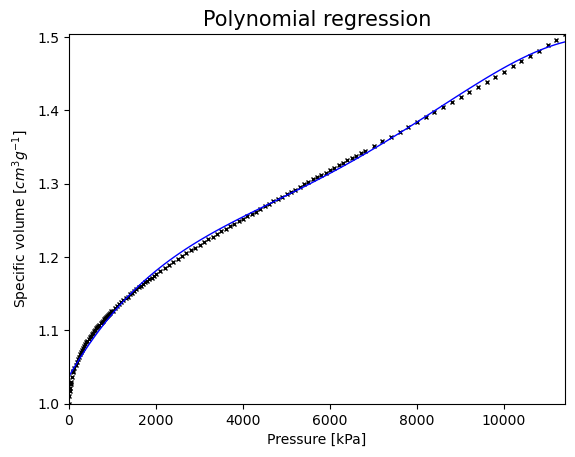

Parameters:  [[ 1.02749631e-04 -1.93838200e-08  2.14712770e-12 -8.15517475e-17]]
Intercept :  [1.03748933]

 R2 for GLM: 0.9970238146790559


In [110]:
ep=np.linspace(Ps[0],Ps[-1],100)

plt.figure()
plt.plot(Ps, Vs,"kx",markersize=3)
plt.plot(ep,GLM.predict(ep),"b",linewidth=1)
plt.title("Polynomial regression", size=15)
plt.xlabel('Pressure [kPa]')
plt.ylabel('Specific volume [$cm^3 g^{-1}$]')
plt.xlim((0, Ps[-1]))
plt.ylim((Vs[0], Vs[-1]))
plt.show()

# Print model parameters
print('Parameters: ', GLM['LR'].coef_)
print('Intercept : ', GLM['LR'].intercept_)
print('\n R2 for GLM:', GLM.score(Ps, Vs))

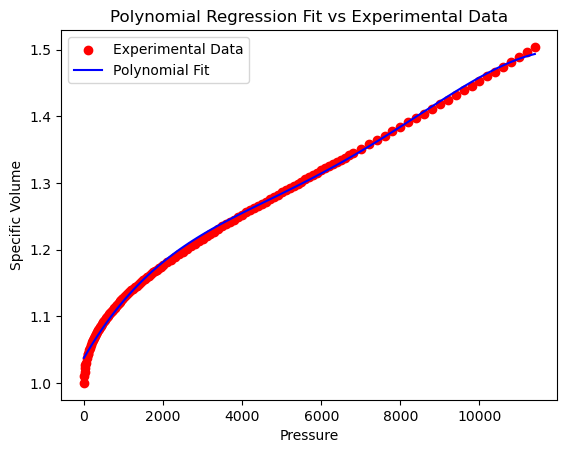

In [111]:

# Extract model parameters
model_params = GLM.named_steps["LR"].coef_  # Polynomial coefficients
intercept = GLM.named_steps["LR"].intercept_  # Intercept

# Step 2: Define the function for Polynomial Regression
def poly_regression(Ps, model):
    """
    Computes the specific volume using the trained polynomial regression model.
    
    Parameters:
    Ps (float or array): Pressure values
    model (Pipeline): Pre-trained sklearn pipeline
    
    Returns:
    float or array: Predicted specific volume
    """
    Ps = np.array(Ps).reshape(-1, 1)
    return model.predict(Ps)  # Use pipeline to transform and predict

# Step 3: Generate predictions
evaluation_points = np.linspace(Ps.min(), Ps.max(), 100)
predicted_Vs = poly_regression(evaluation_points, GLM)

# Step 4: Plot Experimental Data vs Predictions
plt.scatter(Ps, Vs, color='red', label='Experimental Data')  # Actual data points
plt.plot(evaluation_points, predicted_Vs, color='blue', label='Polynomial Fit')  # Regression curve
plt.xlabel("Pressure")
plt.ylabel("Specific Volume")
plt.legend()
plt.title("Polynomial Regression Fit vs Experimental Data")
plt.show()



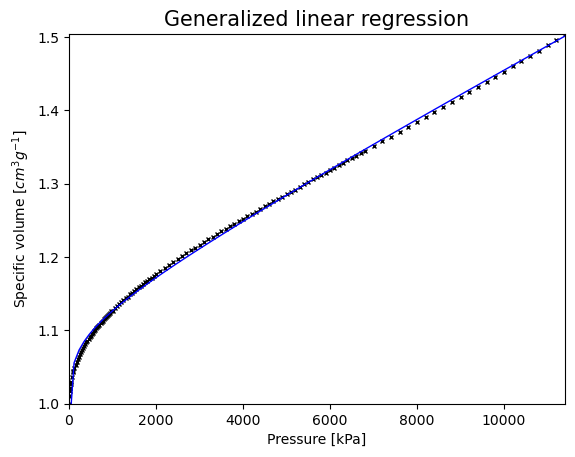

Parameters:  [[3.13403431e-05 2.00436068e-02]]
Intercept :  [0.95683431]


In [125]:
from sklearn.base import BaseEstimator, TransformerMixin
class log_feature(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
       X_log = np.log(X)
       X_new = np.hstack((X, X_log))
       return X_new

log_f = log_feature()

GLM_log = Pipeline([("log_f", log_f), ("LR", LR),])
GLM_log.fit(Ps, Vs)

Pipeline(steps=[('log_f', log_feature()), ('LR', LinearRegression())])

evaluation_points = np.linspace(Ps[0], Ps[-1], 100)

plt.figure()
plt.plot(Ps, Vs, 'kx', markersize=3)
plt.plot(evaluation_points, GLM_log.predict(evaluation_points), 'b', linewidth=1)
plt.title('Generalized linear regression', size=15)
plt.xlabel('Pressure [kPa]')
plt.ylabel('Specific volume [$cm^3 g^{-1}$]')
plt.xlim((0, Ps[-1]))
plt.ylim((Vs[0], Vs[-1]))
plt.show()

# Print model parameters
print('Parameters: ', GLM_log['LR'].coef_)
print('Intercept : ', GLM_log['LR'].intercept_)

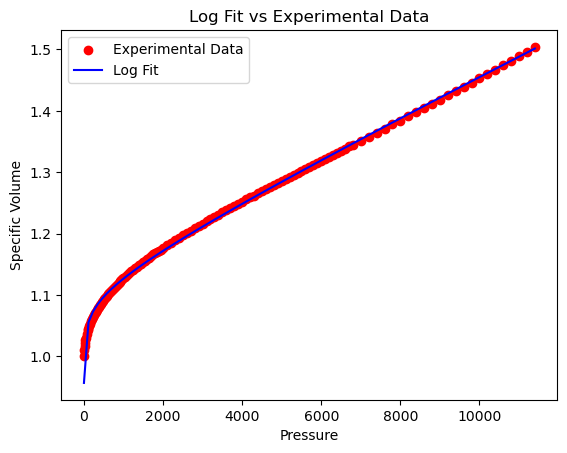


 R2 for GLM: 0.9982014296705168


In [127]:

# Extract model parameters
model_params = GLM_log.named_steps["LR"].coef_  # Polynomial coefficients
intercept = GLM_log.named_steps["LR"].intercept_  # Intercept

# Step 2: Define the function for Polynomial Regression
def log_regression(Ps, model):
    """
    Computes the specific volume using the trained polynomial regression model.
    
    Parameters:
    Ps (float or array): Pressure values
    model (Pipeline): Pre-trained sklearn pipeline
    
    Returns:
    float or array: Predicted specific volume
    """
    Ps = np.array(Ps).reshape(-1, 1)
    return model.predict(Ps)  # Use pipeline to transform and predict

# Step 3: Generate predictions
evaluation_points = np.linspace(Ps.min(), Ps.max(), 100)
predicted_Vs = log_regression(evaluation_points, GLM_log)

# Step 4: Plot Experimental Data vs Predictions
plt.scatter(Ps, Vs, color='red', label='Experimental Data')  # Actual data points
plt.plot(evaluation_points, predicted_Vs, color='blue', label='Log Fit')  # Regression curve
plt.xlabel("Pressure")
plt.ylabel("Specific Volume")
plt.legend()
plt.title("Log Fit vs Experimental Data")
plt.show()

print('\n R2 for GLM:', GLM_log.score(Ps, Vs))